In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
le=LabelEncoder()

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/credit.csv")

In [5]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [6]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [7]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


In [8]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

<AxesSubplot:>

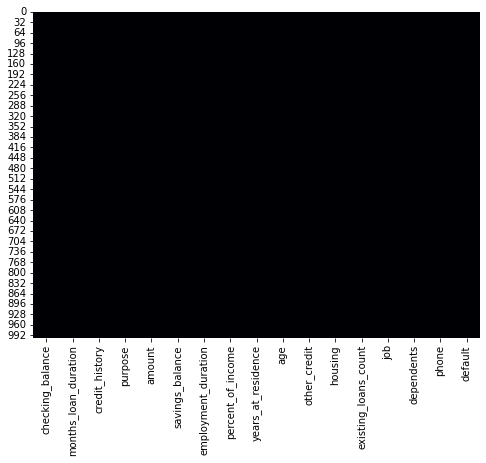

In [9]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [10]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

cols = ['checking_balance', 'credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job',
        'phone','default']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [11]:
df.sample(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
398,1 - 200 DM,12,good,car,1223,< 100 DM,> 7 years,1,1,46,none,rent,2,skilled,1,no,yes
469,unknown,24,poor,car,4679,< 100 DM,4 - 7 years,3,3,35,none,own,2,unskilled,1,yes,no
988,< 0 DM,24,good,car,6579,< 100 DM,unemployed,4,2,29,none,other,1,management,1,yes,no
240,< 0 DM,24,good,car,915,unknown,> 7 years,4,2,29,bank,own,1,skilled,1,no,yes
79,1 - 200 DM,30,good,furniture/appliances,3832,< 100 DM,< 1 year,2,1,22,none,own,1,skilled,1,no,no
711,< 0 DM,6,very good,education,1198,< 100 DM,> 7 years,4,4,35,none,other,1,skilled,1,no,yes
439,> 200 DM,12,very good,business,609,< 100 DM,< 1 year,4,1,26,none,own,1,unemployed,1,no,yes
947,unknown,12,good,car,2859,unknown,unemployed,4,4,38,none,own,1,management,1,yes,no
475,< 0 DM,18,perfect,furniture/appliances,3114,< 100 DM,< 1 year,1,4,26,none,rent,1,skilled,1,no,yes
142,< 0 DM,27,good,furniture/appliances,3416,< 100 DM,1 - 4 years,3,2,27,none,own,1,management,1,no,no


In [12]:
pd.set_option("display.max_columns", None)

In [13]:
df.describe

<bound method NDFrame.describe of     checking_balance  months_loan_duration credit_history  \
0             < 0 DM                     6       critical   
1         1 - 200 DM                    48           good   
2            unknown                    12       critical   
3             < 0 DM                    42           good   
4             < 0 DM                    24           poor   
..               ...                   ...            ...   
995          unknown                    12           good   
996           < 0 DM                    30           good   
997          unknown                    12           good   
998           < 0 DM                    45           good   
999       1 - 200 DM                    45       critical   

                  purpose  amount savings_balance employment_duration  \
0    furniture/appliances    1169         unknown           > 7 years   
1    furniture/appliances    5951        < 100 DM         1 - 4 years   
2             

In [30]:
cols = ['checking_balance', 'credit_history','purpose','savings_balance','employment_duration','other_credit','job','phone','housing','default']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [31]:
df.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,0,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,0,1
5,3,36,1,3,9055,4,0,2,4,35,1,0,1,3,2,1,0
6,3,24,1,4,2835,1,3,3,4,53,1,1,1,1,1,0,0
7,0,36,1,1,6948,2,0,2,2,35,1,2,1,0,1,1,0
8,3,12,1,4,3059,3,1,2,4,61,1,1,1,3,1,0,0
9,0,30,0,1,5234,2,4,4,2,28,1,1,2,0,1,0,1


In [32]:
df.dtypes

checking_balance        int64
months_loan_duration    int64
credit_history          int64
purpose                 int64
amount                  int64
savings_balance         int64
employment_duration     int64
percent_of_income       int64
years_at_residence      int64
age                     int64
other_credit            int64
housing                 int64
existing_loans_count    int64
job                     int64
dependents              int64
phone                   int64
default                 int32
dtype: object

In [33]:
 #building our linear model
x=df.drop(['default'],axis=1) #independent variables
y=df[['default']] #dependent variable

# Splitting the data

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Logistic Regression

In [35]:
clf_model=LogisticRegression()
clf_model.fit(x_train, y_train)

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
clf_model.score(x_train,y_train)

0.7314285714285714

In [37]:
clf_model.score(x_test,y_test)

0.7166666666666667

# Metrics

In [38]:
predictions =clf_model.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       214
           1       0.51      0.33      0.40        86

    accuracy                           0.72       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.72      0.70       300



In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[187,  27],
       [ 58,  28]], dtype=int64)

<AxesSubplot:>

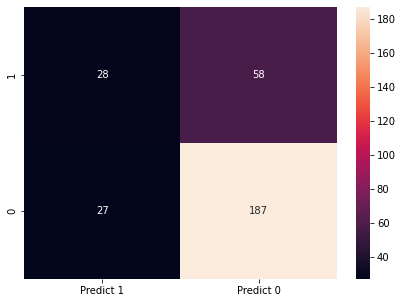

In [40]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1,0])

df_cm=pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')